In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
import seaborn as sns
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from Bio.SeqUtils import molecular_weight, MeltingTemp as mt
from nupack import *
import itertools
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
def verify_na(sequence):
    '''This code verifies if a sequence is a DNA or RNA'''
    # set the input sequence
    seq = set(sequence)
     
    # confirm if its elements is equal to the
    # set of valid DNA bases
    # Use a union method to ensure the sequence is
    # verified if does not contain all the bases
    if seq == {"A", "T", "C", "G"}.union(seq):
        return "DNA"
    elif seq == {"A", "U", "C", "G"}.union(seq):
        return "RNA"
    elif seq == {"A", "C", "G"}.union(seq):
        return "DNA"
            seq = seq[::-1]
        return seq
 
    elif verified == "RNA":
       
        # complement strand
        seq = sequence.replace("A", "u").replace(
            "C", "g").replace("U", "a").replace("G", "c")
        seq = seq.upper()
         
        # reverse strand
        seq = seq[::-1]
        return seq
    else:
        return False
    
def dna_to_mrna(inputDNA):
    '''This function reverts the DNA sequences to RNA transcripts'''
    MRNA = ''
    for code in inputDNA:
        if code == 'T':
            MRNA = MRNA + 'U'
        if code == 'C':
            MRNA = MRNA + 'C'
        if code == 'A':
            MRNA = MRNA + 'A'
        if code == 'G':
            MRNA = MRNA + 'G'

    return MRNA

def score_match(subject, query, subject_start, query_start, length):
    score = 0
    # for each base in the match
    for i in range(0,length):
        # first figure out the matching base from both sequences
        subject_base = subject[subject_start + i]
        query_base = query[query_start + i]
        # then adjust the score up or down depending on 
        # whether or not they are the same
        if subject_base == query_base:
            score = score + 1
        else:
            score = score - 1
    return score

def try_all_matches(subject, query):

 # try every possible value for subject start and query start
    for subject_start in range(0,len(subject)):
        for query_start in range(0,len(query)):

            # try every possible value for length of match    
            # the length can never be longer than the length of the shortest 
            # input sequence, so it doesn't matter whether we use the query or the subject
            for length in range(1,len(query)):

                # this will generate lots of proposed matches which go beyond the 
                # length of one of the input sequences
                # so we will only try to score those that fit within the two sequences
                if (subject_start + length < len(subject) and query_start + length < len(query)):
                    score = score_match(subject, query, subject_start, query_start, length)
                    print(subject_start, query_start, length, score)

def try_all_matches(subject, query, score_limit):
    for subject_start in range(0,len(subject)):
        for query_start in range(0,len(query)):
            for length in range(0,len(query)):
                if (subject_start + length < len(subject) and query_start + length < len(query)):
                    score = score_match(subject, query, subject_start, query_start, length)
                    # only print a line of output if the score is better than some limie
                    if (score >= score_limit):
                        print(subject_start, query_start, length, score)

def pretty_print_match(subject, query, subject_start, query_start, length):

    # first print the start/stop positions for the subject sequence
    print(str(subject_start) + (' ' * length) + str(subject_start+length))

    # then print the bit of the subject that matches
    print(' ' + subject[subject_start:subject_start+length])

    # then print the bit of the query that matches
    print(' ' + query[query_start:query_start+length])

    # finally print the start/stop positions for the query
    print(str(query_start) + (' ' * length) + str(query_start+length))

    print('\n--------------------\n')

def try_all_matches(subject, query, score_limit):
    for subject_start in range(0,len(subject)):
        for query_start in range(0,len(query)):
            for length in range(0,len(query)):
                if (subject_start + length < len(subject) and query_start + length < len(query)):
                    score = score_match(subject, query, subject_start, query_start, length)
                    # only print a line of output if the score is better than some limie
                    if (score >= score_limit):
                        #print('Score : ' + str(score))
                        query_end =query_start+length
                        #pretty_print_match(subject, query, subject_start, query_start, length)
                        return True, query_start, query_end

In [4]:
class dna_sequence:
    def __init__(self, name, sequence, length, mw, tm):
        self.name = name
        self.sequence = sequence
        self.complement = _complement(self.sequence)
        self.length = length
        self.mw = mw
        self.tm = tm

In [9]:
sq1 = dna_sequence('sq1', 'TTGAGGTCGCCCTCAAAGGTT', 21, 6437.2, 59)
sq2 = dna_sequence('sq2', 'TCGCTGTCAAAGTTCGAGGTG', 21, 6477.2, 57.5)
sq3 = dna_sequence('sq3', 'TTCAGGGCGAGGACCATAGAG', 21, 6520.3, 58.3)
sq4 = dna_sequence('sq4', 'AATTCAGGGCGAGGACCATAG', 21, 6504.3, 56.7)
sq5 = dna_sequence('sq5', 'GCCTCAGAGAATCGCCAGTACT', 22, 6704.4, 58.6)

# Best two sequences for each of the siRNA
# Add first sequence
# Control siRNA which does not hybridise with any mRNA with the same hairpin sticky ends: TTCTCCGAACGTGTCACGT
# Check with control if it forms a complex with the mMMP9 and probabilities

In [10]:
rna_seq = pd.DataFrame({'Name': [sq1.name, sq2.name, sq3.name, sq4.name, sq5.name],
                   'Sequence': [sq1.sequence, sq2.sequence, sq3.sequence, sq4.sequence, sq5.sequence],
                   'Complement': [sq1.complement, sq2.complement, sq3.complement, sq4.complement, sq5.complement],
                   'Length': [sq1.length, sq2.length, sq3.length, sq4.length, sq5.length],
                    'MW': [sq1.mw, sq2.mw, sq3.mw, sq4.mw, sq5.mw], 
                    'Tm(°C)': [sq1.tm, sq2.tm, sq3.tm, sq4.tm, sq5.tm]})

In [11]:
print(rna_seq)

  Name                Sequence              Complement  Length      MW  Tm(°C)
0  sq1   TTGAGGTCGCCCTCAAAGGTT   AACCTTTGAGGGCGACCTCAA      21  6437.2    59.0
1  sq2   TCGCTGTCAAAGTTCGAGGTG   CACCTCGAACTTTGACAGCGA      21  6477.2    57.5
2  sq3   TTCAGGGCGAGGACCATAGAG   CTCTATGGTCCTCGCCCTGAA      21  6520.3    58.3
3  sq4   AATTCAGGGCGAGGACCATAG   CTATGGTCCTCGCCCTGAATT      21  6504.3    56.7
4  sq5  GCCTCAGAGAATCGCCAGTACT  AGTACTGGCGATTCTCTGAGGC      22  6704.4    58.6


In [12]:
# To start with, we would need to double-check if the above sequences have a comlementariety towards the MMP9 RNA sequence
# First we will upload the sequences of the targetted genes.
# Once, we have double checked that the given sequences do indeed have a complement sequence towards the MMP9 gene
# We will extract and save the correponding sequences +,- 15bp to then perform the hybridization analysis
# The Nupack library used for the complex analysis of hybridization works with sequences up to a certain range, hence the need to split the MMP9 into the sequences which perform the binding

mmp9_rna = open('rna_mmp9.txt', 'r').read()
mmp9_rna = mmp9_rna.replace('\n', '')

hyb_col = []
mmp9_seqs = []
for seq in rna_seq['Complement']:
    seq_length = rna_seq.iloc[rna_seq.index.get_loc(rna_seq[rna_seq['Complement'] == seq].index[0])]['Length']
    equal = try_all_matches(seq, mmp9_rna, seq_length-2)
    hyb_col.append(equal[0])
    if equal[0] == True:
        if equal[1] <= 15:
            q_st = 0
            q_ed = equal[2] + 15
        elif equal[2] >= len(mmp9_rna)-15: 
            q_st = equal[1] - 15
            q_ed = equal[2] + abs(len(mmp9_rna) - equal[2])
        else:
            q_st =  equal[1] - 15
            q_ed = equal[2] + 15
            
        mmp9_seqs.append(mmp9_rna[q_st:q_ed])
    else:
        mmp9_seqs.append(np.NaN)

rna_seq['Hyb'] = hyb_col
rna_seq['MMP9_Seq'] = mmp9_seqs
rna_seq = rna_seq.fillna(value=False)
print(rna_seq)

  Name                Sequence              Complement  Length      MW  \
0  sq1   TTGAGGTCGCCCTCAAAGGTT   AACCTTTGAGGGCGACCTCAA      21  6437.2   
1  sq2   TCGCTGTCAAAGTTCGAGGTG   CACCTCGAACTTTGACAGCGA      21  6477.2   
2  sq3   TTCAGGGCGAGGACCATAGAG   CTCTATGGTCCTCGCCCTGAA      21  6520.3   
3  sq4   AATTCAGGGCGAGGACCATAG   CTATGGTCCTCGCCCTGAATT      21  6504.3   
4  sq5  GCCTCAGAGAATCGCCAGTACT  AGTACTGGCGATTCTCTGAGGC      22  6704.4   

   Tm(°C)   Hyb                                           MMP9_Seq  
0    59.0  True  CCTGGGCAGATTCCAAACCTTTGAGGGCGACCTCAAGTGGCACCACCAC  
1    57.5  True  CCTCTGGTGCGCTACCACCTCGAACTTTGACAGCGACAAGAAGTGGGGC  
2    58.3  True  AATGGCATCCGGCACCTCTATGGTCCTCGCCCTGAACCTGAGCCACGGC  
3    56.7  True  TGGCATCCGGCACCTCTATGGTCCTCGCCCTGAACCTGAGCCACGGCCT  
4    58.6  True  TGTTCAAGGATGGGAAGTACTGGCGATTCTCTGAGGGCAGGGGGAG...  


In [13]:
# Now we can design and generate RNA sequences containing the complementary sequence to the MMP9, plus two complementary sequences with 3 GC sites to promote Hairpin formation.
# After the design, we can perform the modelling to analyse MFEs and pair probabilities of every generated sequence

# Define the nucleotides
nucleotides = ['A', 'C', 'G', 'T']
reverse_complementary_hairpins =[]
seq_complement=''

# Define panda where sequences will be stored
hairpin_pd = pd.DataFrame()

# Generate all possible combinations of nucleotides of length 7 as this is the hairpin length with over 1 possibility with 2,4 'GC' content
sequences = list(itertools.product(nucleotides, repeat=7))
# Filter for sequences that contain 3 (or 2) 'GC' nucleotides
filtered_sequences = [seq for seq in sequences if ''.join(seq).count('GC') == 2 or ''.join(seq).count('GC') == 4]
# Convert list of tuples to list of strings
list_of_strings = [''.join(t) for t in filtered_sequences]
# Get a list of the reverse complemente haipin sequences
for seq in list_of_strings:
    seq_complement = _complement(seq)
    reverse_complementary_hairpins.append(seq_complement)
    seq_complement=''
    
# We construct the hairpin sequences by adding the hairpin complementary bp to each end of the siRNA sequence
hairpins = []
seq_name = []
hairpin_length = []
hairpin_mw = []
hairpin_mt = []
mmp9_snippets = []
for name, sequence in zip(rna_seq['Name'],rna_seq['Complement']):
    for seq,rev in zip(list_of_strings, reverse_complementary_hairpins):
        hairpin = seq + sequence + rev
        hairpins.append(hairpin)
        seq_name.append(name)
        hairpin_length.append(len(hairpin))
        hairpin_mw.append(molecular_weight(hairpin.replace('T','U'), 'RNA'))
        hairpin_mt.append(mt.Tm_Wallace(hairpin.replace('T','U')))
        mmp9_snippet = rna_seq.iloc[rna_seq.index.get_loc(rna_seq[rna_seq['Complement'] == sequence].index[0])]['MMP9_Seq']
        mmp9_snippets.append(mmp9_snippet)

hairpin_pd['Name'] = seq_name
hairpin_pd['Hairpin'] = hairpins
hairpin_pd['Length'] = hairpin_length
hairpin_pd['MW'] = hairpin_mw
hairpin_pd['Tm(°C)'] = hairpin_mt
hairpin_pd['MMP9_Seq'] = mmp9_snippets # This column contains the fragement of MMP9 sequence the hairpin should hybridise with

print(hairpin_pd)

     Name                               Hairpin  Length          MW  Tm(°C)  \
0     sq1   AAAGCGCAACCTTTGAGGGCGACCTCAAGCGCTTT      35  11282.6901   108.0   
1     sq1   AACGCGCAACCTTTGAGGGCGACCTCAAGCGCGTT      35  11297.7047   112.0   
2     sq1   AAGCAGCAACCTTTGAGGGCGACCTCAAGCTGCTT      35  11282.6901   108.0   
3     sq1   AAGCCGCAACCTTTGAGGGCGACCTCAAGCGGCTT      35  11297.7047   112.0   
4     sq1   AAGCGCAAACCTTTGAGGGCGACCTCAATGCGCTT      35  11282.6901   108.0   
...   ...                                   ...     ...         ...     ...   
2955  sq5  TTGCGCTAGTACTGGCGATTCTCTGAGGCAGCGCAA      36  11621.8397   112.0   
2956  sq5  TTGCGGCAGTACTGGCGATTCTCTGAGGCGCCGCAA      36  11636.8543   116.0   
2957  sq5  TTGCTGCAGTACTGGCGATTCTCTGAGGCGCAGCAA      36  11621.8397   112.0   
2958  sq5  TTGGCGCAGTACTGGCGATTCTCTGAGGCGCGCCAA      36  11636.8543   116.0   
2959  sq5  TTTGCGCAGTACTGGCGATTCTCTGAGGCGCGCAAA      36  11621.8397   112.0   

                                               MMP9

In [17]:
# At this stage, we have constructed a database with all the possible harpin sequences which can hybridise with MMP9
# Now, we need to predict their looping free energies, as well as, the free energies of the hybridisation process between hairpin and MMP9 to see if the process would be spontaneuos and promoted

# Define physical model 
mmp9_model = Model(material='rna', celsius=37)
# Define the energy gap (kcal/mol) for calculating suboptimal structures
gap = 1.1

# Calculate hairpin sequences stability analysis and complex(hairpin+MMP9) sequences stability analysis
# Define lists to store dG and MFE values and bp probabilites
hairpin_mfe = []
hairpin_dg = []
hairpin_p = []

hyb_mfe = []
hyb_dg = []
hyb_p = []

for hairpin, gene in zip(hairpin_pd['Hairpin'], hairpin_pd['MMP9_Seq']):
    # Define the strands
    hp_st = Strand(hairpin, name='hp_st')
    mmp9_st = Strand(gene, name='mmp9_st')
    # Define the complex of interest
    hp_complex = Complex([hp_st]) # Secondary structure of hairpin folding
    hyb_complex = Complex([hp_st, mmp9_st]) # Hybridisation between hairpin and gene of interest
    # Define the complex set to contain only one complex for both cases
    hp_set = ComplexSet(strands={hp_st: 1e-8}, complexes=SetSpec(max_size=0, include=[hp_complex]))
    hyb_set = ComplexSet(strands={hp_st: 1e-8, mmp9_st: 1e-8}, complexes=SetSpec(max_size=0, include=[hyb_complex]))
    
    # Analyze the complex 
    # Calculate pfunc, pairs, mfe, subopt
    hp_result = complex_analysis(hp_set, compute=['pfunc', 'pairs', 'mfe', 'subopt'], 
                             options={'energy_gap': gap}, model=mmp9_model)
    hyb_result = complex_analysis(hyb_set, compute=['pfunc', 'pairs', 'mfe', 'subopt'], 
                             options={'energy_gap': gap}, model=mmp9_model)
    
    # Store predicted dG and MFE values and bp probabilites
    hairpin_result = hp_result[hp_complex]
    hyb_result = hyb_result[hyb_complex]
    hairpin_dg.append(hairpin_result.free_energy)
    hairpin_mfe.append(hairpin_result.mfe[0][1])
    hairpin_p.append(hairpin_result.pairs.to_array())
    hyb_dg.append(hyb_result.free_energy)
    hyb_mfe.append(hyb_result.mfe[0][1])
    hyb_p.append(hyb_result.pairs.to_array())

hairpin_pd['Hairpin_dG (kcal/mol)'] = hairpin_dg
hairpin_pd['Hairpin_MFE (kcal/mol)'] = hairpin_mfe
hairpin_pd['Hairpin_Pb'] = hairpin_p

hairpin_pd['Hyb_dG (kcal/mol)'] = hyb_dg
hairpin_pd['Hyb_MFE (kcal/mol)'] = hyb_mfe
hairpin_pd['Hyb_Pb'] = hyb_p


In [18]:
# Now, we need to clean the rows in which either the MFE of hybridisation or hairpin are positive
# We also need to clean the rows in which the MFE for hybridisation is higher than the hairpin one - as once inside the cell they will not open to bind to the mRNA of MMP9
hairpin_pd = hairpin_pd[(hairpin_pd['Hairpin_MFE (kcal/mol)'] < 0) & (hairpin_pd['Hyb_MFE (kcal/mol)'] < 0) & (hairpin_pd['Hairpin_MFE (kcal/mol)'] > hairpin_pd['Hyb_MFE (kcal/mol)'])]
print(hairpin_pd)

     Name                               Hairpin  Length          MW  Tm(°C)  \
0     sq1   AAAGCGCAACCTTTGAGGGCGACCTCAAGCGCTTT      35  11282.6901   108.0   
1     sq1   AACGCGCAACCTTTGAGGGCGACCTCAAGCGCGTT      35  11297.7047   112.0   
2     sq1   AAGCAGCAACCTTTGAGGGCGACCTCAAGCTGCTT      35  11282.6901   108.0   
3     sq1   AAGCCGCAACCTTTGAGGGCGACCTCAAGCGGCTT      35  11297.7047   112.0   
4     sq1   AAGCGCAAACCTTTGAGGGCGACCTCAATGCGCTT      35  11282.6901   108.0   
...   ...                                   ...     ...         ...     ...   
2955  sq5  TTGCGCTAGTACTGGCGATTCTCTGAGGCAGCGCAA      36  11621.8397   112.0   
2956  sq5  TTGCGGCAGTACTGGCGATTCTCTGAGGCGCCGCAA      36  11636.8543   116.0   
2957  sq5  TTGCTGCAGTACTGGCGATTCTCTGAGGCGCAGCAA      36  11621.8397   112.0   
2958  sq5  TTGGCGCAGTACTGGCGATTCTCTGAGGCGCGCCAA      36  11636.8543   116.0   
2959  sq5  TTTGCGCAGTACTGGCGATTCTCTGAGGCGCGCAAA      36  11621.8397   112.0   

                                               MMP9

<Axes: xlabel='MFE (kcal/mol)', ylabel='Density'>

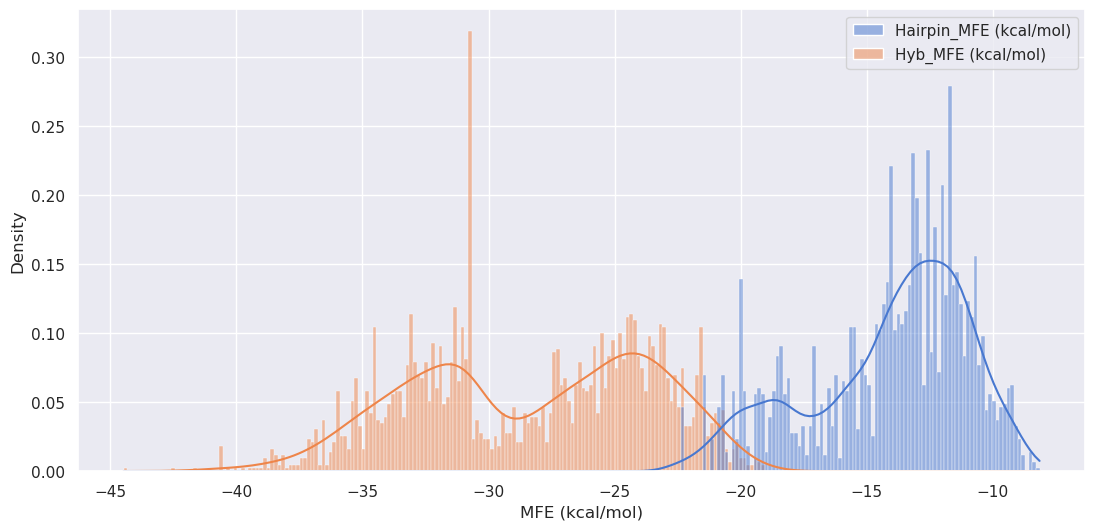

In [23]:
# Data visualisation and statistics to choose between prefered sequences
# Plot histogram with the distribution of energies

fig, ax = plt.subplots()
fig.set_size_inches(13, 6)
ax.set(xlabel='MFE (kcal/mol)')
sns.set_style("darkgrid")
sns.set(color_codes=True)
sns.set(palette="muted")
sns.histplot([hairpin_pd['Hairpin_MFE (kcal/mol)'], hairpin_pd['Hyb_MFE (kcal/mol)']], 
                stat="density", bins=250, common_norm=False, kde=True, fill=True, ax=ax)

<Axes: xlabel='MFE (kcal/mol)', ylabel='Density'>

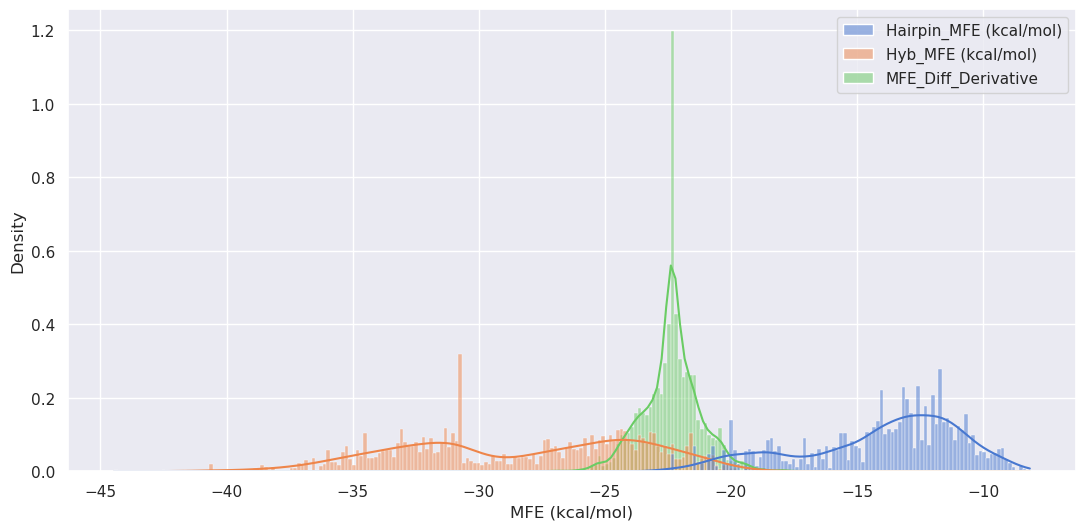

In [70]:
# Data visualisation and statistics to choose between prefered sequences
# Plot histogram with the distribution of energies and the difference between them

diff_mfe = np.subtract(hairpin_pd['Hyb_MFE (kcal/mol)'], hairpin_pd['Hairpin_MFE (kcal/mol)']) # Calculate the difference between complexes 
hairpin_pd['MFE_Diff (kcal/mol)'] = diff_mfe
hairpin_pd['MFE_Diff_Derivative'] = np.gradient(diff_mfe)+np.min(hairpin_pd['Hairpin_MFE (kcal/mol)']) # Append the list of differences into the dataframe

fig, ax = plt.subplots()
fig.set_size_inches(13, 6)
ax.set(xlabel='MFE (kcal/mol)')
sns.set_style("darkgrid")
sns.set(color_codes=True)
sns.set(palette="muted")
sns.histplot([hairpin_pd['Hairpin_MFE (kcal/mol)'], hairpin_pd['Hyb_MFE (kcal/mol)'], hairpin_pd['MFE_Diff_Derivative']], 
             stat="density", bins=250, common_norm=False, kde=True, fill=True, ax=ax)


In [137]:
# Let's remove the rows where the values for both Hairpin and Hybridisation complex match, as well as those lying 1-std around that point
# Take the difference between distributions and build a a new distribution with those values, then calculate the statistics and dicriminate accordingly

diff_mean = np.mean(diff_mfe)
diff_std = np.std(diff_mfe)
sig_diff = abs(diff_mean) + 2.3*diff_std

# Remove rows from the database where the difference between the hairpin and hybridised form not on the range mean+std
hairpin_pd_cleaned = hairpin_pd[((hairpin_pd['Hairpin_MFE (kcal/mol)'] - hairpin_pd['Hyb_MFE (kcal/mol)']) > sig_diff)]
print(hairpin_pd_cleaned)

     Name                               Hairpin  Length          MW  Tm(°C)  \
406   sq1   GCTGCCCAACCTTTGAGGGCGACCTCAAGGGCAGC      35  11312.7193   116.0   
408   sq1   GCTGCCTAACCTTTGAGGGCGACCTCAAAGGCAGC      35  11297.7047   112.0   
2373  sq5  AAGCGCCAGTACTGGCGATTCTCTGAGGCGGCGCTT      36  11636.8543   116.0   
2375  sq5  AAGCGCTAGTACTGGCGATTCTCTGAGGCAGCGCTT      36  11621.8397   112.0   
2385  sq5  ACGCGCCAGTACTGGCGATTCTCTGAGGCGGCGCGT      36  11651.8689   120.0   
2387  sq5  ACGCGCTAGTACTGGCGATTCTCTGAGGCAGCGCGT      36  11636.8543   116.0   
2396  sq5  AGCAGCCAGTACTGGCGATTCTCTGAGGCGGCTGCT      36  11636.8543   116.0   
2404  sq5  AGCCGCCAGTACTGGCGATTCTCTGAGGCGGCGGCT      36  11651.8689   120.0   
2434  sq5  AGCTGCCAGTACTGGCGATTCTCTGAGGCGGCAGCT      36  11636.8543   116.0   
2442  sq5  AGGCGCCAGTACTGGCGATTCTCTGAGGCGGCGCCT      36  11651.8689   120.0   
2444  sq5  AGGCGCTAGTACTGGCGATTCTCTGAGGCAGCGCCT      36  11636.8543   116.0   
2450  sq5  ATCGCGCAGTACTGGCGATTCTCTGAGGCGCGCGAT     

<Axes: xlabel='MFE (kcal/mol)', ylabel='Density'>

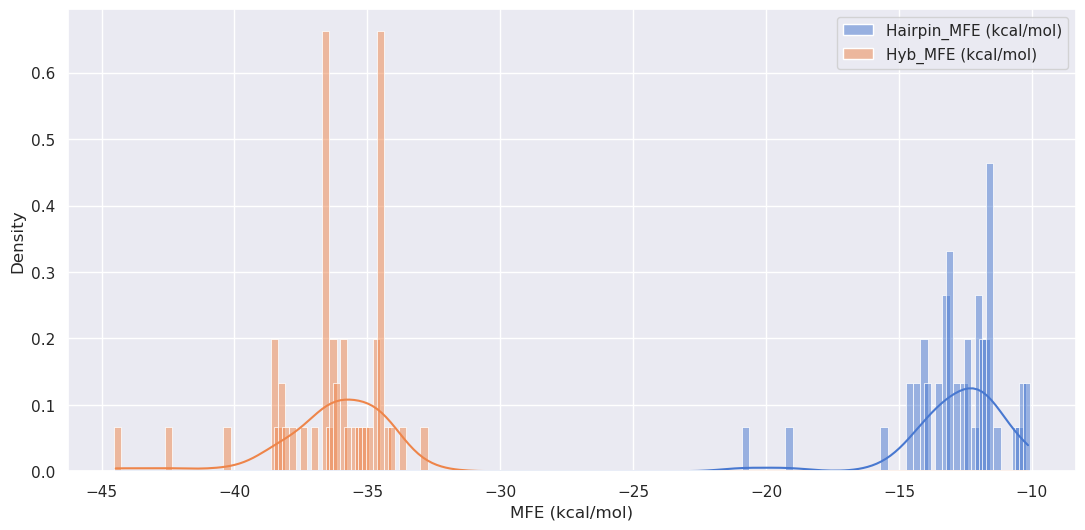

In [138]:
# Plot a histogram to see the difference in energy from the cleaned dataset and check that the overlapping section has been removed

fig, ax = plt.subplots()
fig.set_size_inches(13, 6)
ax.set(xlabel='MFE (kcal/mol)')
sns.set_style("darkgrid")
sns.set(color_codes=True)
sns.set(palette="muted")
sns.histplot([hairpin_pd_cleaned['Hairpin_MFE (kcal/mol)'], hairpin_pd_cleaned['Hyb_MFE (kcal/mol)']], 
             stat="density", shrink=2, bins=250, fill=True, kde=True, ax=ax)

Text(0.5, 1.0, 'MFE Distributions for the Hairpin, the Hybridisation Complex and their Difference ')

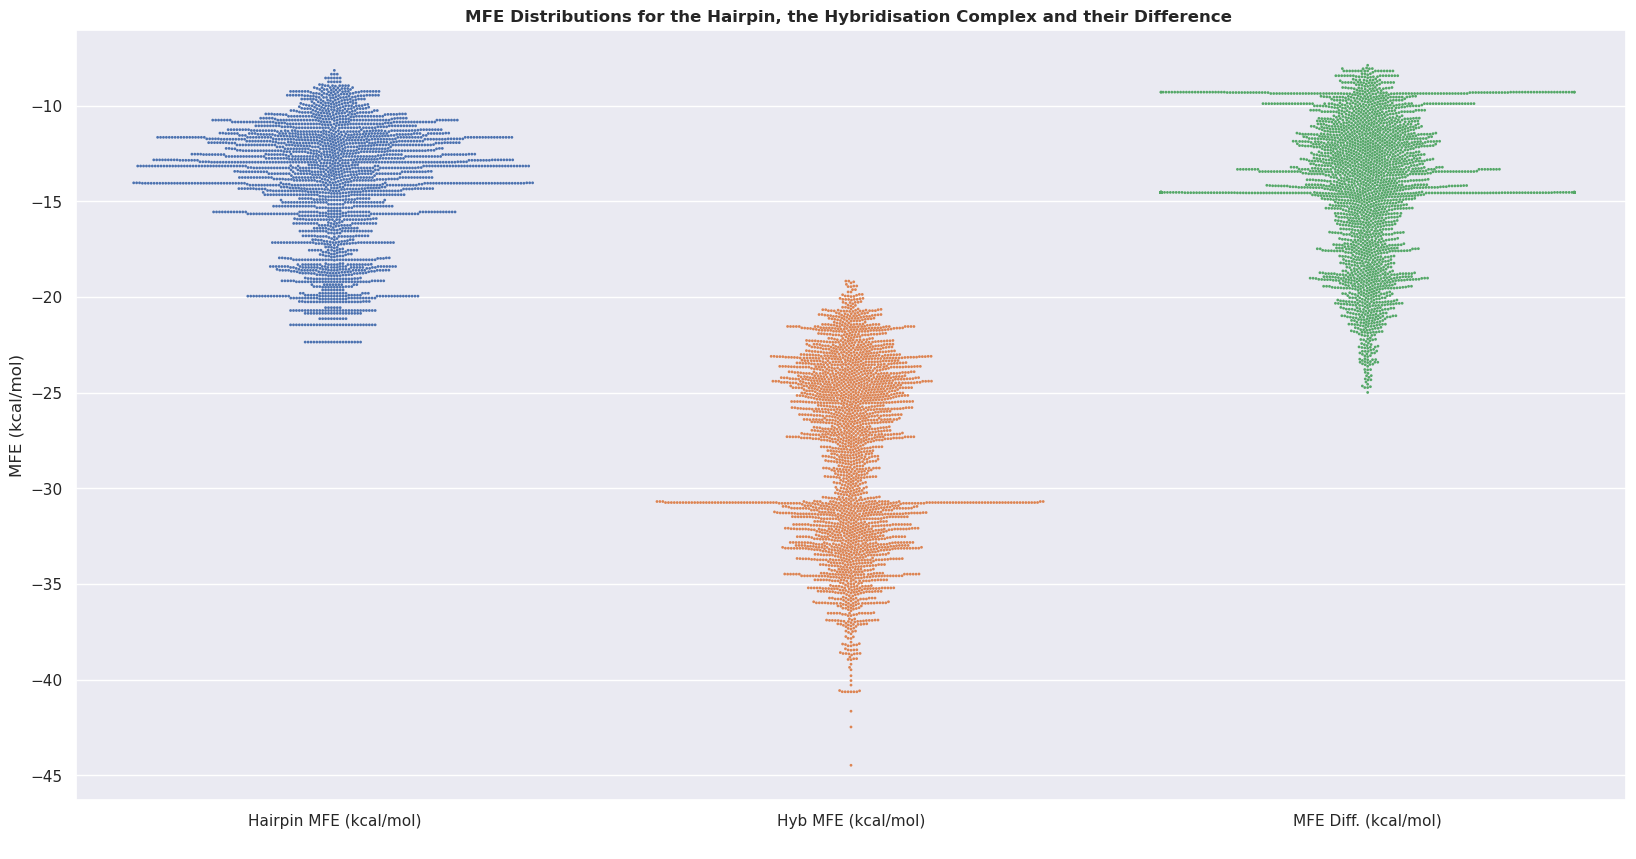

In [73]:
# Data visualisation and statistics to choose between prefered sequences
# Plot swarm plot with the distribution of energies and the difference between them
# To achieve this, we need to arrange the data into a preliminary dataset so seaborn can read it

hairpin_pd_plot = pd.DataFrame() # Define panda and input the complementary data
variable = ['Hairpin MFE (kcal/mol)']*len(hairpin_pd['Hairpin_MFE (kcal/mol)']) + ['Hyb MFE (kcal/mol)']*len(hairpin_pd['Hairpin_MFE (kcal/mol)']) + ['MFE Diff. (kcal/mol)']*len(hairpin_pd['Hairpin_MFE (kcal/mol)'])

values = (hairpin_pd['Hairpin_MFE (kcal/mol)'].to_list() + hairpin_pd['Hyb_MFE (kcal/mol)'].to_list() + hairpin_pd['MFE_Diff (kcal/mol)'].to_list())
hairpin_pd_plot[' '] = variable
hairpin_pd_plot['MFE (kcal/mol)'] = values

fig, ax = plt.subplots() # plot the data to see the differences in MFE between hybridisation and hairpin structures
fig.set_size_inches(20, 10)
sns.swarmplot(x =' ' , y ='MFE (kcal/mol)', hue=' ', data = hairpin_pd_plot, size=2, palette='deep')
ax.set_title('MFE Distributions for the Hairpin, the Hybridisation Complex and their Difference ', weight='bold', fontsize=12)

Text(0.5, 1.0, 'MFE Distributions for the Hairpin and the Hybridisation Complex after energy overlap removal')

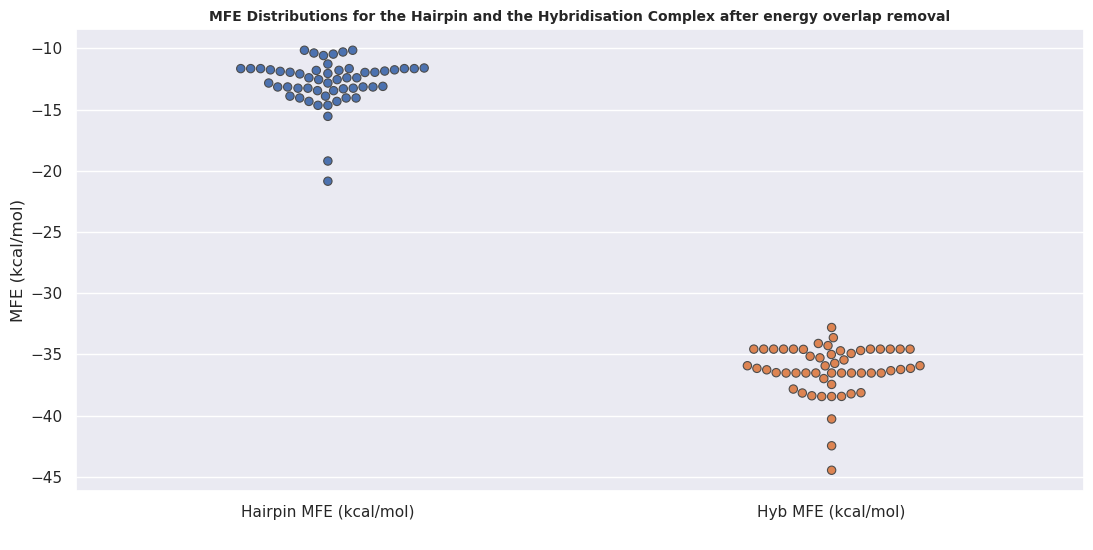

In [139]:
# Plot a swarm to see the difference in energy from the cleaned dataset and check that the overlapping section has been removed
# To achieve this, we need to arrange the data into a preliminary dataset so seaborn can read it

hairpin_pd_plot = pd.DataFrame() # Panda definition and data input
variable = ['Hairpin MFE (kcal/mol)']*len(hairpin_pd_cleaned['Hairpin_MFE (kcal/mol)']) + ['Hyb MFE (kcal/mol)']*len(hairpin_pd_cleaned['Hairpin_MFE (kcal/mol)'])

values = (hairpin_pd_cleaned['Hairpin_MFE (kcal/mol)'].to_list() + hairpin_pd_cleaned['Hyb_MFE (kcal/mol)'].to_list())
hairpin_pd_plot[' '] = variable
hairpin_pd_plot['MFE (kcal/mol)'] = values

fig, ax = plt.subplots() # plot the data
fig.set_size_inches(13, 6)
sns.swarmplot(x =' ' , y ='MFE (kcal/mol)', hue=' ', data = hairpin_pd_plot, size=6, palette='deep', linewidth = 0.8)
ax.set_title('MFE Distributions for the Hairpin and the Hybridisation Complex after energy overlap removal', weight='bold', fontsize=10)

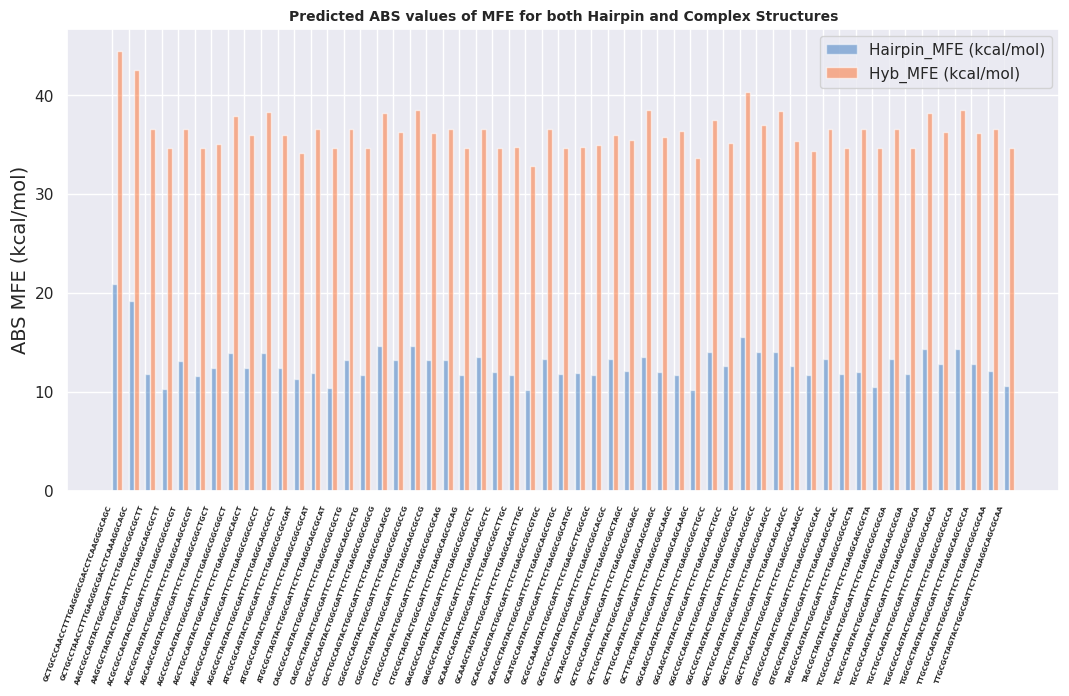

In [140]:
#At this stage, we can plot again both MFE values to see their difference

# Create a figure and axis with a specific size
fig, ax = plt.subplots(figsize=(12.8, 6))
width1 = 0.3
ar = np.arange(len(hairpin_pd_cleaned['Hairpin'])) # Range values for the set of Hairpin Sequences
# We plot the data from the dataset for both the Hairpin and the Hybrid complex predicted energies
ax.bar(ar, abs(hairpin_pd_cleaned['Hairpin_MFE (kcal/mol)']), width=0.3, align='edge', label='Hairpin_MFE (kcal/mol)', color=sns.xkcd_rgb['windows blue'], alpha=0.5)
ax.bar(ar + width1, abs(hairpin_pd_cleaned['Hyb_MFE (kcal/mol)']), width=0.3, align='edge', label='Hyb_MFE (kcal/mol)', color=sns.xkcd_rgb['orangish'], alpha=0.6)
ax.set_ylabel('ABS MFE (kcal/mol)', fontsize=14)
ax.set_title('Predicted ABS values of MFE for both Hairpin and Complex Structures', fontsize=10, weight='bold')
ax.set_xticks(ar, hairpin_pd_cleaned['Hairpin'], rotation=70, fontweight='bold', fontsize='5', horizontalalignment='right', minor=False)
ax.legend()


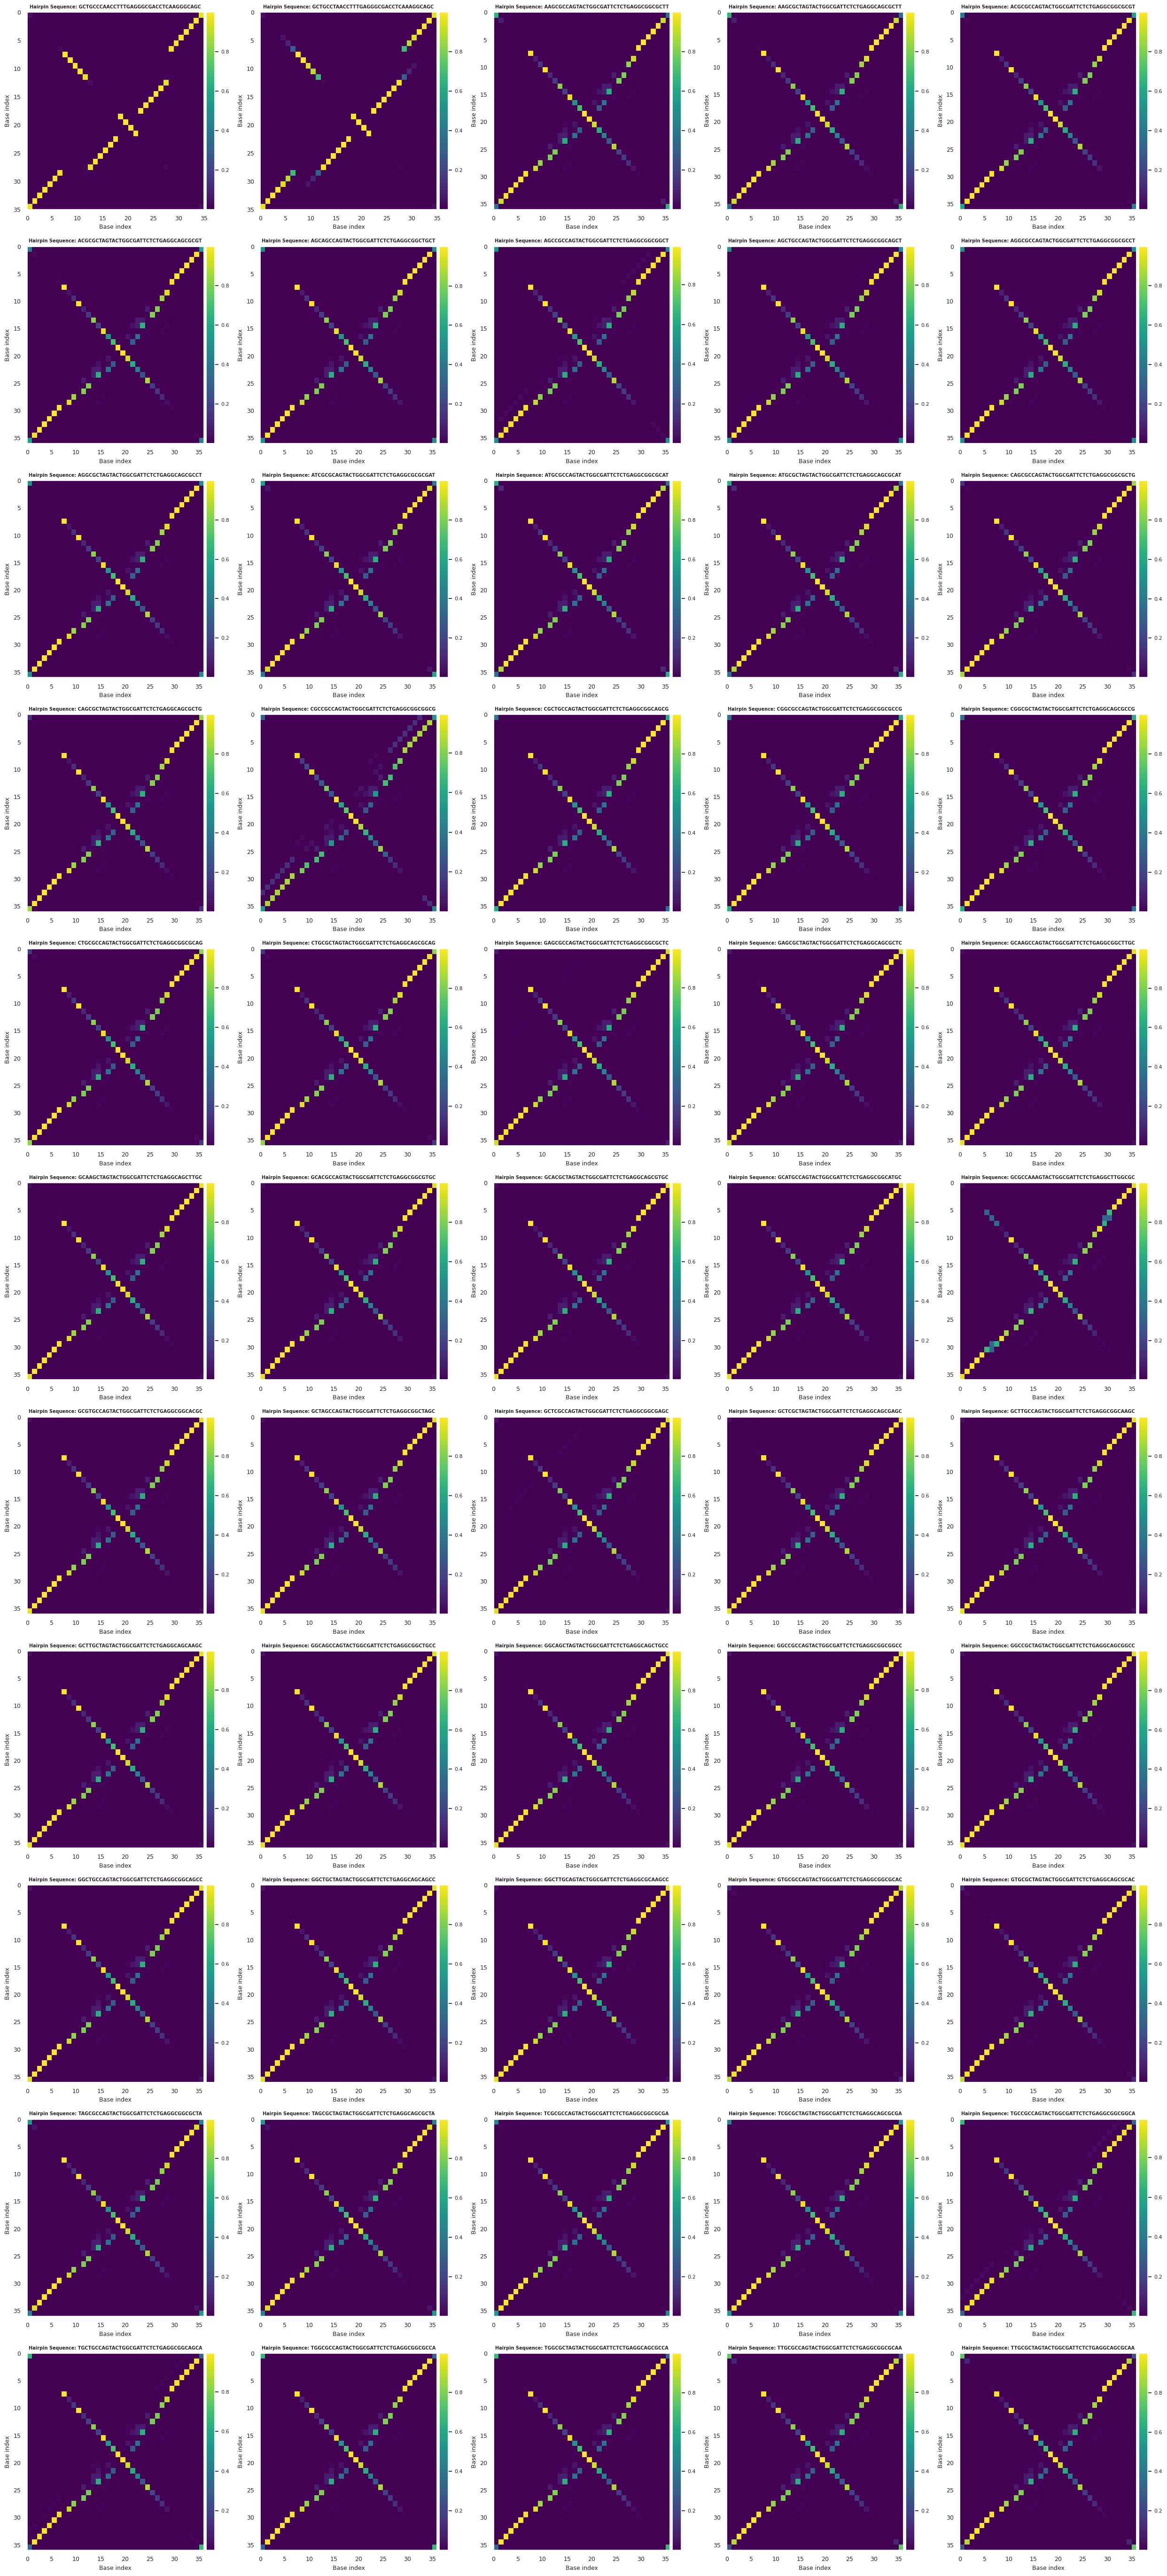

In [142]:
# Plot the probability matrices for visualisation. Hairpin sequences

fig, axs = plt.subplots(nrows=11, ncols=5, figsize=(25, 55))
fig.subplots_adjust(wspace=0.5)
for ax, pb, hairpin in zip(axs.flat, hairpin_pd_cleaned['Hairpin_Pb'], hairpin_pd_cleaned['Hairpin']):
    im = ax.imshow(pb, interpolation='nearest', cmap='viridis', aspect='auto', extent=[0,len(hairpin),len(hairpin),0])
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cax.xaxis.set_ticks_position('default')
    cbar = fig.colorbar(im, cax=cax, orientation='vertical', ticks=[0.2, 0.4, 0.6, 0.8])
    cbar.ax.tick_params(labelsize=8)
    
    ax.set_title('Hairpin Sequence: ' + hairpin, fontsize=7, weight='bold')
    ax.set_xlabel('Base index', fontsize=9)
    ax.set_ylabel('Base index', fontsize=9)
    ax.xaxis.set_tick_params(labelsize=9)
    ax.yaxis.set_tick_params(labelsize=9)
    ax.grid(False)

plt.tight_layout()
plt.show()

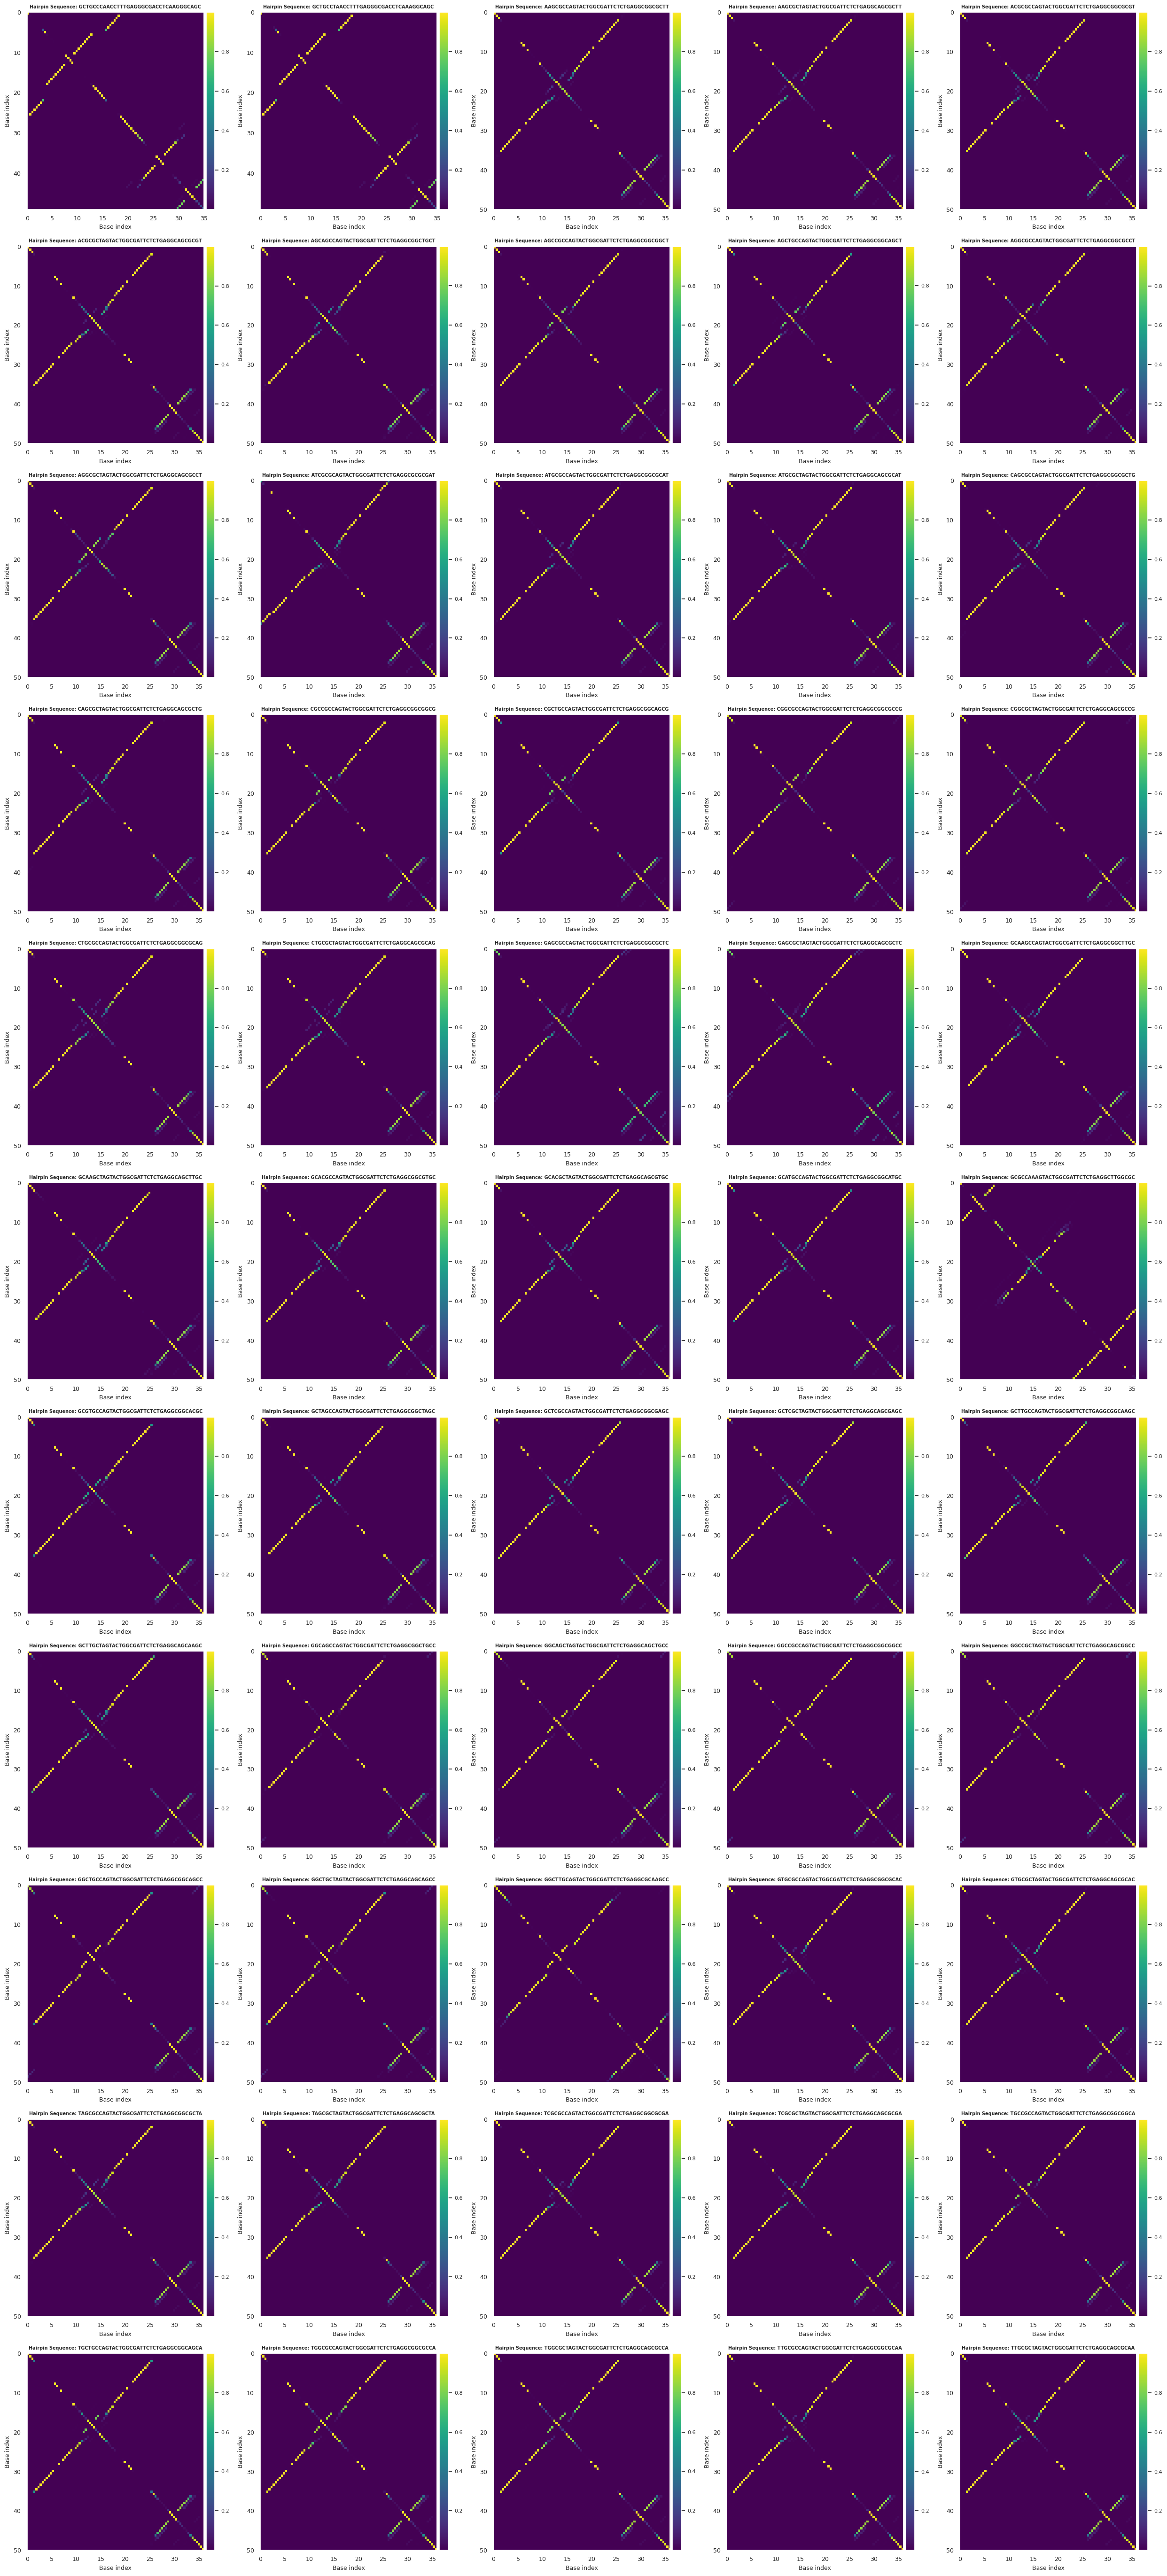

In [143]:
# Plot the probability matrices for visualisation. Hybrid complexes

fig, axs = plt.subplots(nrows=11, ncols=5, figsize=(25, 55))
fig.subplots_adjust(wspace=0.5)
for ax, pb, hairpin, mmp9 in zip(axs.flat, hairpin_pd_cleaned['Hyb_Pb'], hairpin_pd_cleaned['Hairpin'], hairpin_pd_cleaned['MMP9_Seq']):
    im = ax.imshow(pb, interpolation='nearest', cmap='viridis', aspect='auto', extent=[0,len(hairpin),len(mmp9),0])
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cax.xaxis.set_ticks_position('default')
    cbar = fig.colorbar(im, cax=cax, orientation='vertical', ticks=[0.2, 0.4, 0.6, 0.8])
    cbar.ax.tick_params(labelsize=8)
    
    ax.set_title('Hairpin Sequence: ' + hairpin, fontsize=7, weight='bold')
    ax.set_xlabel('Base index', fontsize=9)
    ax.set_ylabel('Base index', fontsize=9)
    ax.xaxis.set_tick_params(labelsize=9)
    ax.yaxis.set_tick_params(labelsize=9)
    ax.grid(False)

plt.tight_layout()
plt.show()

In [144]:
# To clean the data further, we can add the diagonal values from the probability base pair matrix to assess which sequences will have a higher predicted 
# base pairing and hence will hybridise and group into a hairpin at higher rates while mitigating cross-talk

hyb_pb = []
hp_pb = []
# Calculate diagonal sum of probability matrix values
for pb_hair, pb_hyb in zip(hairpin_pd_cleaned['Hairpin_Pb'], hairpin_pd_cleaned['Hyb_Pb']):
    pb_ha, pb_hy = np.asarray(pb_hair), np.asarray(pb_hyb)
    hp_pb.append(np.trace(pb_ha))
    hyb_pb.append(np.trace(pb_hy))

# Add the calculated values in our cleaned database
hairpin_pd_cleaned.insert(14, 'D_Pb_Hairpin', hp_pb, True)
hairpin_pd_cleaned.insert(15, 'D_Pb_Hyb', hyb_pb, True)

# Remove the rows of which values are lower than the mean values of the sum over the diagonal probabilities
hairpin_pd_optimised = hairpin_pd_cleaned[(hairpin_pd_cleaned['D_Pb_Hairpin'] > np.mean(hp_pb)) & (hairpin_pd_cleaned['D_Pb_Hyb'] > np.mean(hyb_pb))]
print(hairpin_pd_optimised)


     Name                               Hairpin  Length          MW  Tm(°C)  \
2373  sq5  AAGCGCCAGTACTGGCGATTCTCTGAGGCGGCGCTT      36  11636.8543   116.0   
2385  sq5  ACGCGCCAGTACTGGCGATTCTCTGAGGCGGCGCGT      36  11651.8689   120.0   
2396  sq5  AGCAGCCAGTACTGGCGATTCTCTGAGGCGGCTGCT      36  11636.8543   116.0   
2434  sq5  AGCTGCCAGTACTGGCGATTCTCTGAGGCGGCAGCT      36  11636.8543   116.0   
2454  sq5  ATGCGCCAGTACTGGCGATTCTCTGAGGCGGCGCAT      36  11636.8543   116.0   
2497  sq5  CGCCGCCAGTACTGGCGATTCTCTGAGGCGGCGGCG      36  11666.8835   124.0   
2527  sq5  CGCTGCCAGTACTGGCGATTCTCTGAGGCGGCAGCG      36  11651.8689   120.0   
2872  sq5  TAGCGCCAGTACTGGCGATTCTCTGAGGCGGCGCTA      36  11636.8543   116.0   
2884  sq5  TCGCGCCAGTACTGGCGATTCTCTGAGGCGGCGCGA      36  11651.8689   120.0   
2903  sq5  TGCCGCCAGTACTGGCGATTCTCTGAGGCGGCGGCA      36  11651.8689   120.0   
2933  sq5  TGCTGCCAGTACTGGCGATTCTCTGAGGCGGCAGCA      36  11636.8543   116.0   
2953  sq5  TTGCGCCAGTACTGGCGATTCTCTGAGGCGGCGCAA     

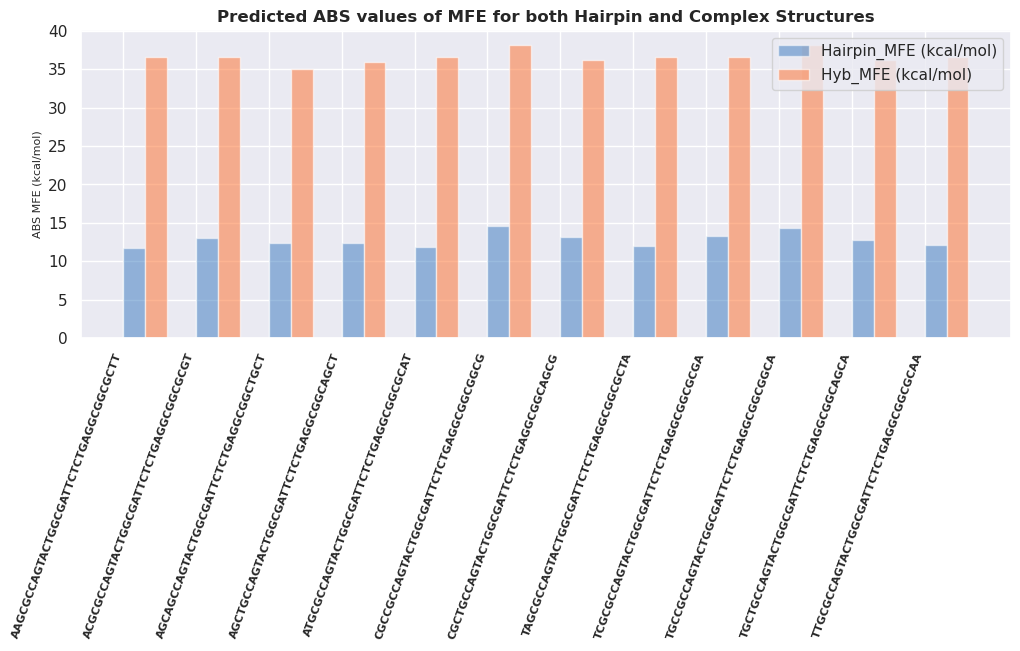

In [145]:
#Plot again MFE values (hairpin, complex) for the sequences left after the last step of optimisation

# Create a figure and axis with a specific size
fig, ax = plt.subplots(figsize=(12, 4))
width1 = 0.3
ar = np.arange(len(hairpin_pd_optimised['Hairpin'])) # Range values for the set of Hairpin Sequences

# We plot the data from the dataset for both the Hairpin and the Hybrid complex predicted energies
ax.bar(ar, abs(hairpin_pd_optimised['Hairpin_MFE (kcal/mol)']), width=0.3, align='edge', label='Hairpin_MFE (kcal/mol)', color=sns.xkcd_rgb['windows blue'], alpha=0.5)
ax.bar(ar + width1, abs(hairpin_pd_optimised['Hyb_MFE (kcal/mol)']), width=0.3, align='edge', label='Hyb_MFE (kcal/mol)', color=sns.xkcd_rgb['orangish'], alpha=0.6)
ax.set_ylabel('ABS MFE (kcal/mol)', fontsize=8)
ax.set_title('Predicted ABS values of MFE for both Hairpin and Complex Structures', fontsize=12, weight='bold')
ax.set_xticks(ar, hairpin_pd_optimised['Hairpin'], rotation=70, fontweight='bold', fontsize='8', horizontalalignment='right', minor=False)
ax.legend()

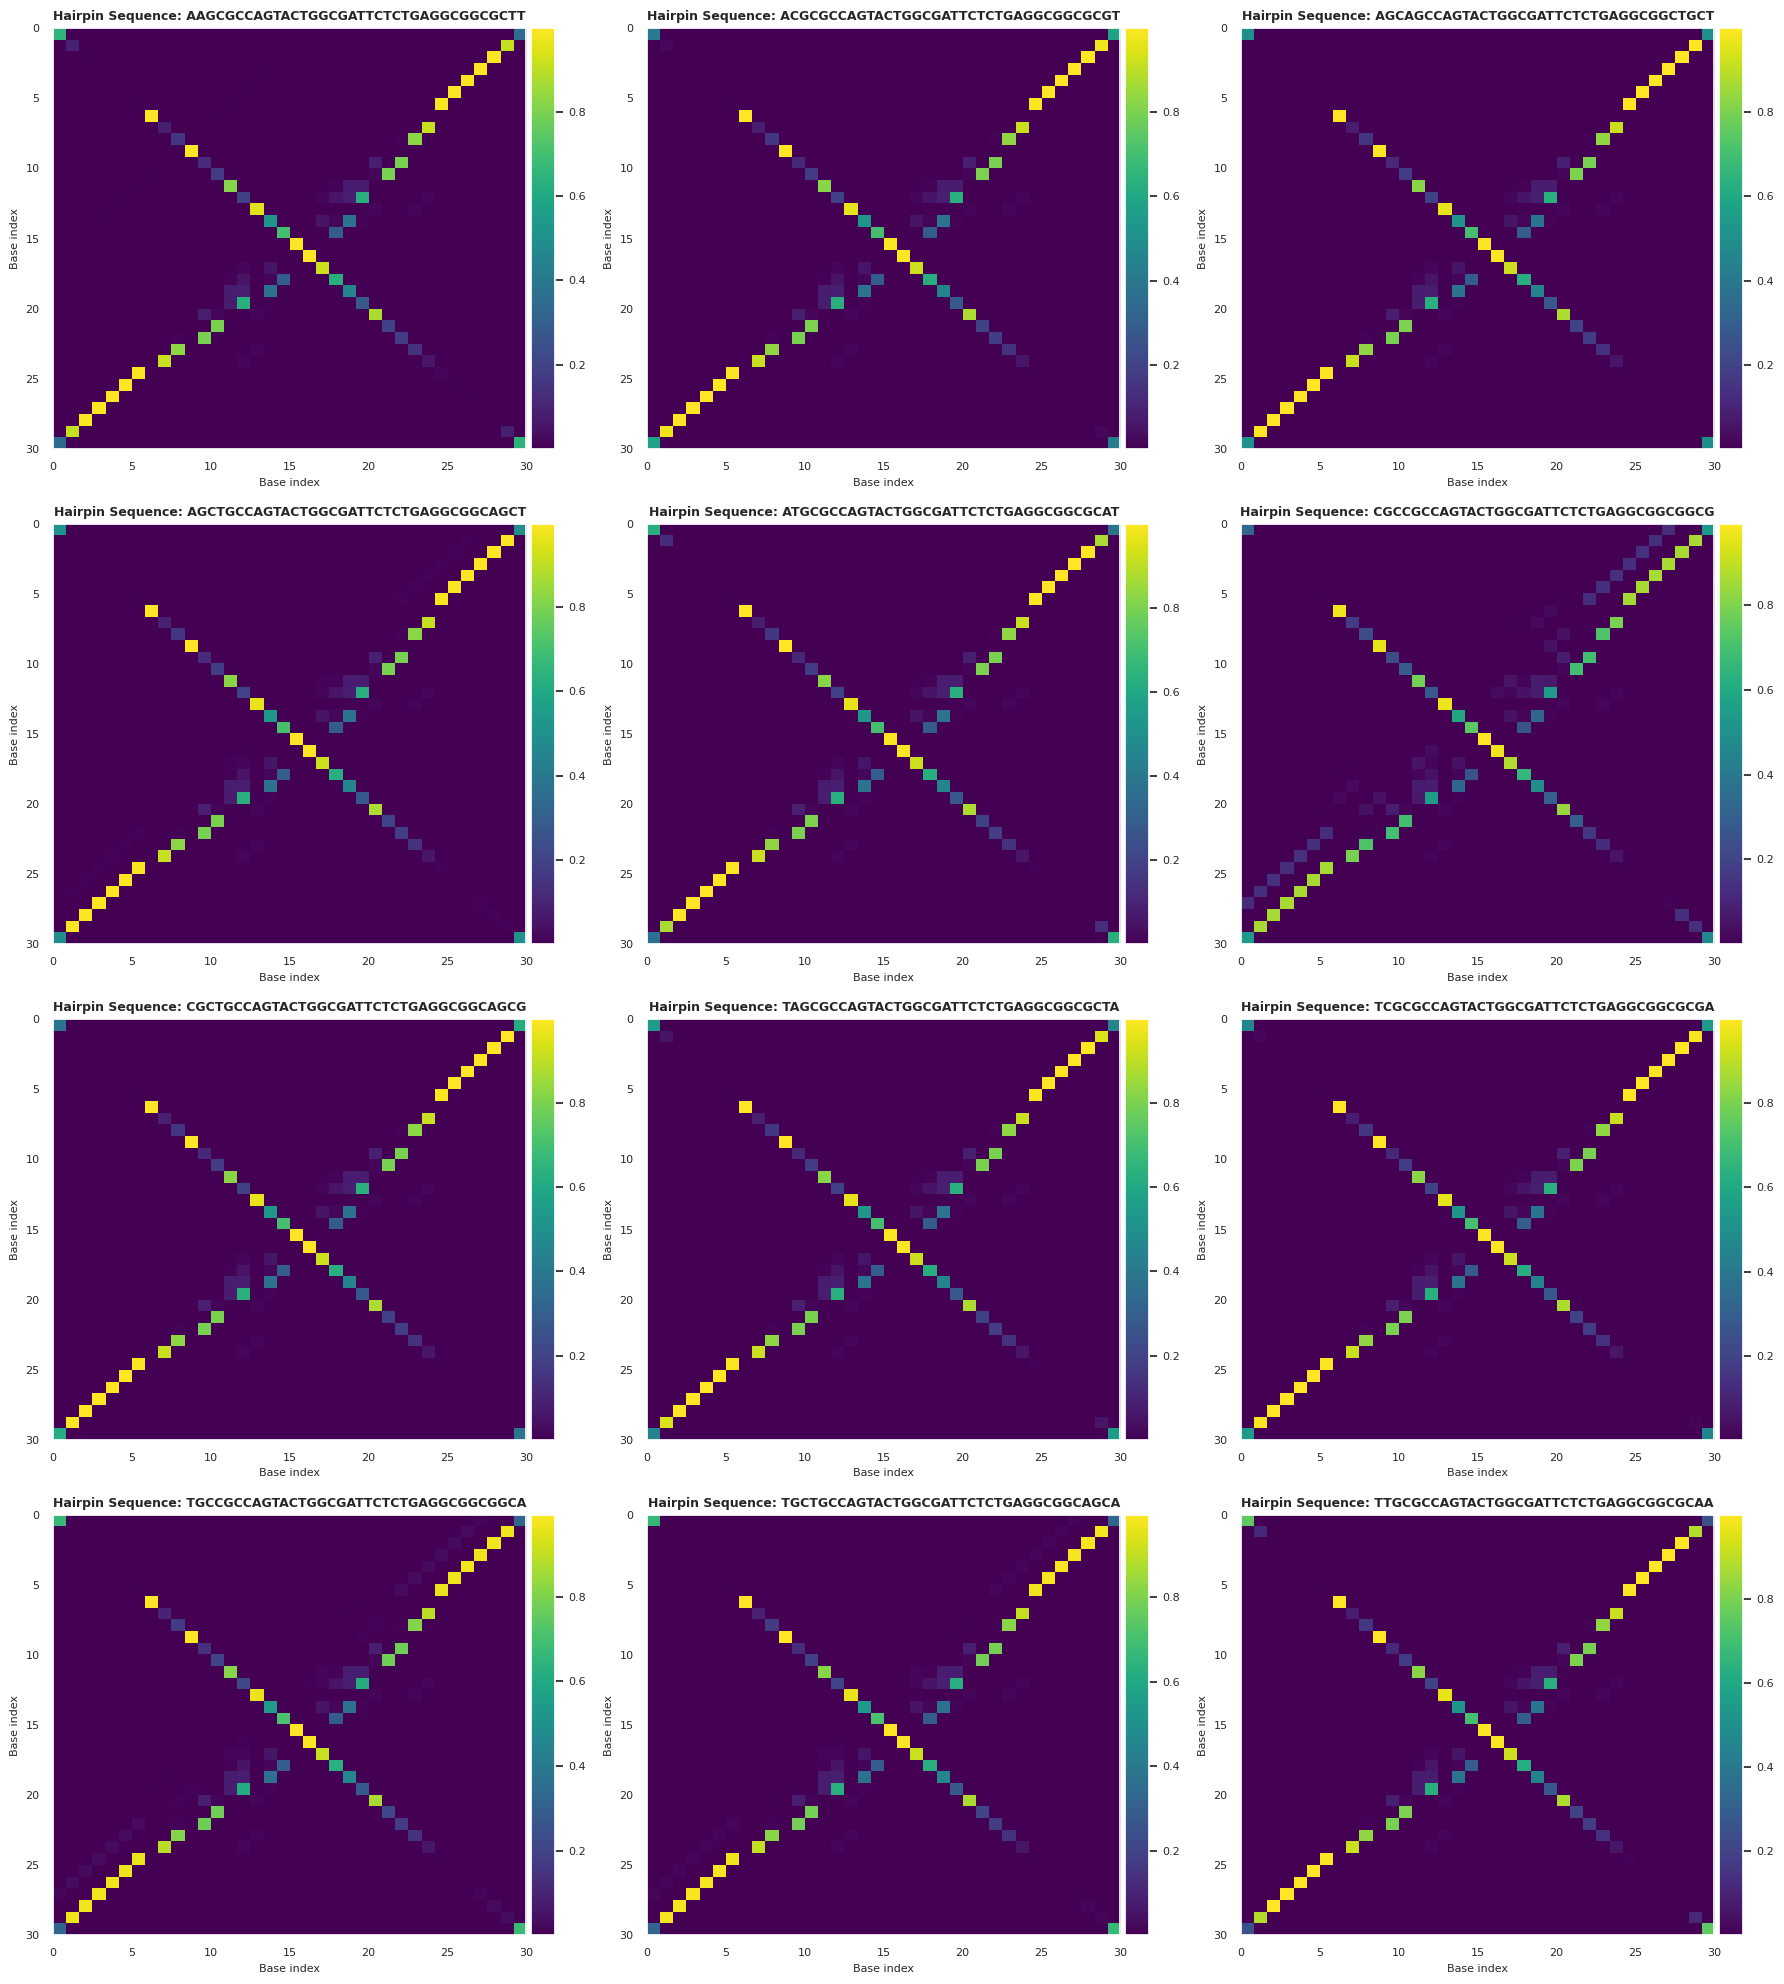

In [146]:
# Plot the probability matrices for visualisation. Hairpin sequences

fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(18, 20))
fig.subplots_adjust(wspace=0.5)
for ax, pb, hairpin in zip(axs.flat, hairpin_pd_optimised['Hairpin_Pb'], hairpin_pd_optimised['Hairpin']):
    im = ax.imshow(pb, interpolation='nearest', cmap='viridis', aspect='auto', extent=[0,30,30,0])
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cax.xaxis.set_ticks_position('default')
    cbar = fig.colorbar(im, cax=cax, orientation='vertical', ticks=[0.2, 0.4, 0.6, 0.8])
    cbar.ax.tick_params(labelsize=8)
    
    ax.set_title('Hairpin Sequence: ' + hairpin, fontsize=9, weight='bold')
    ax.set_xlabel('Base index', fontsize=8)
    ax.set_ylabel('Base index', fontsize=8)
    ax.xaxis.set_tick_params(labelsize=8)
    ax.yaxis.set_tick_params(labelsize=8)
    ax.grid(False)

plt.tight_layout()
plt.show()
fig.savefig('pb_matrix_hairpin.png')

AAGCGCCAGTACTGGCGATTCTCTGAGGCGGCGCTT
TGTTCAAGGATGGGAAGTACTGGCGATTCTCTGAGGGCAGGGGGAGCCGG
ACGCGCCAGTACTGGCGATTCTCTGAGGCGGCGCGT
TGTTCAAGGATGGGAAGTACTGGCGATTCTCTGAGGGCAGGGGGAGCCGG
AGCAGCCAGTACTGGCGATTCTCTGAGGCGGCTGCT
TGTTCAAGGATGGGAAGTACTGGCGATTCTCTGAGGGCAGGGGGAGCCGG
AGCTGCCAGTACTGGCGATTCTCTGAGGCGGCAGCT
TGTTCAAGGATGGGAAGTACTGGCGATTCTCTGAGGGCAGGGGGAGCCGG
ATGCGCCAGTACTGGCGATTCTCTGAGGCGGCGCAT
TGTTCAAGGATGGGAAGTACTGGCGATTCTCTGAGGGCAGGGGGAGCCGG
CGCCGCCAGTACTGGCGATTCTCTGAGGCGGCGGCG
TGTTCAAGGATGGGAAGTACTGGCGATTCTCTGAGGGCAGGGGGAGCCGG
CGCTGCCAGTACTGGCGATTCTCTGAGGCGGCAGCG
TGTTCAAGGATGGGAAGTACTGGCGATTCTCTGAGGGCAGGGGGAGCCGG
TAGCGCCAGTACTGGCGATTCTCTGAGGCGGCGCTA
TGTTCAAGGATGGGAAGTACTGGCGATTCTCTGAGGGCAGGGGGAGCCGG
TCGCGCCAGTACTGGCGATTCTCTGAGGCGGCGCGA
TGTTCAAGGATGGGAAGTACTGGCGATTCTCTGAGGGCAGGGGGAGCCGG
TGCCGCCAGTACTGGCGATTCTCTGAGGCGGCGGCA
TGTTCAAGGATGGGAAGTACTGGCGATTCTCTGAGGGCAGGGGGAGCCGG
TGCTGCCAGTACTGGCGATTCTCTGAGGCGGCAGCA
TGTTCAAGGATGGGAAGTACTGGCGATTCTCTGAGGGCAGGGGGAGCCGG
TTGCGCCAGTACTGGCGATTCTCTGAGGCGGC

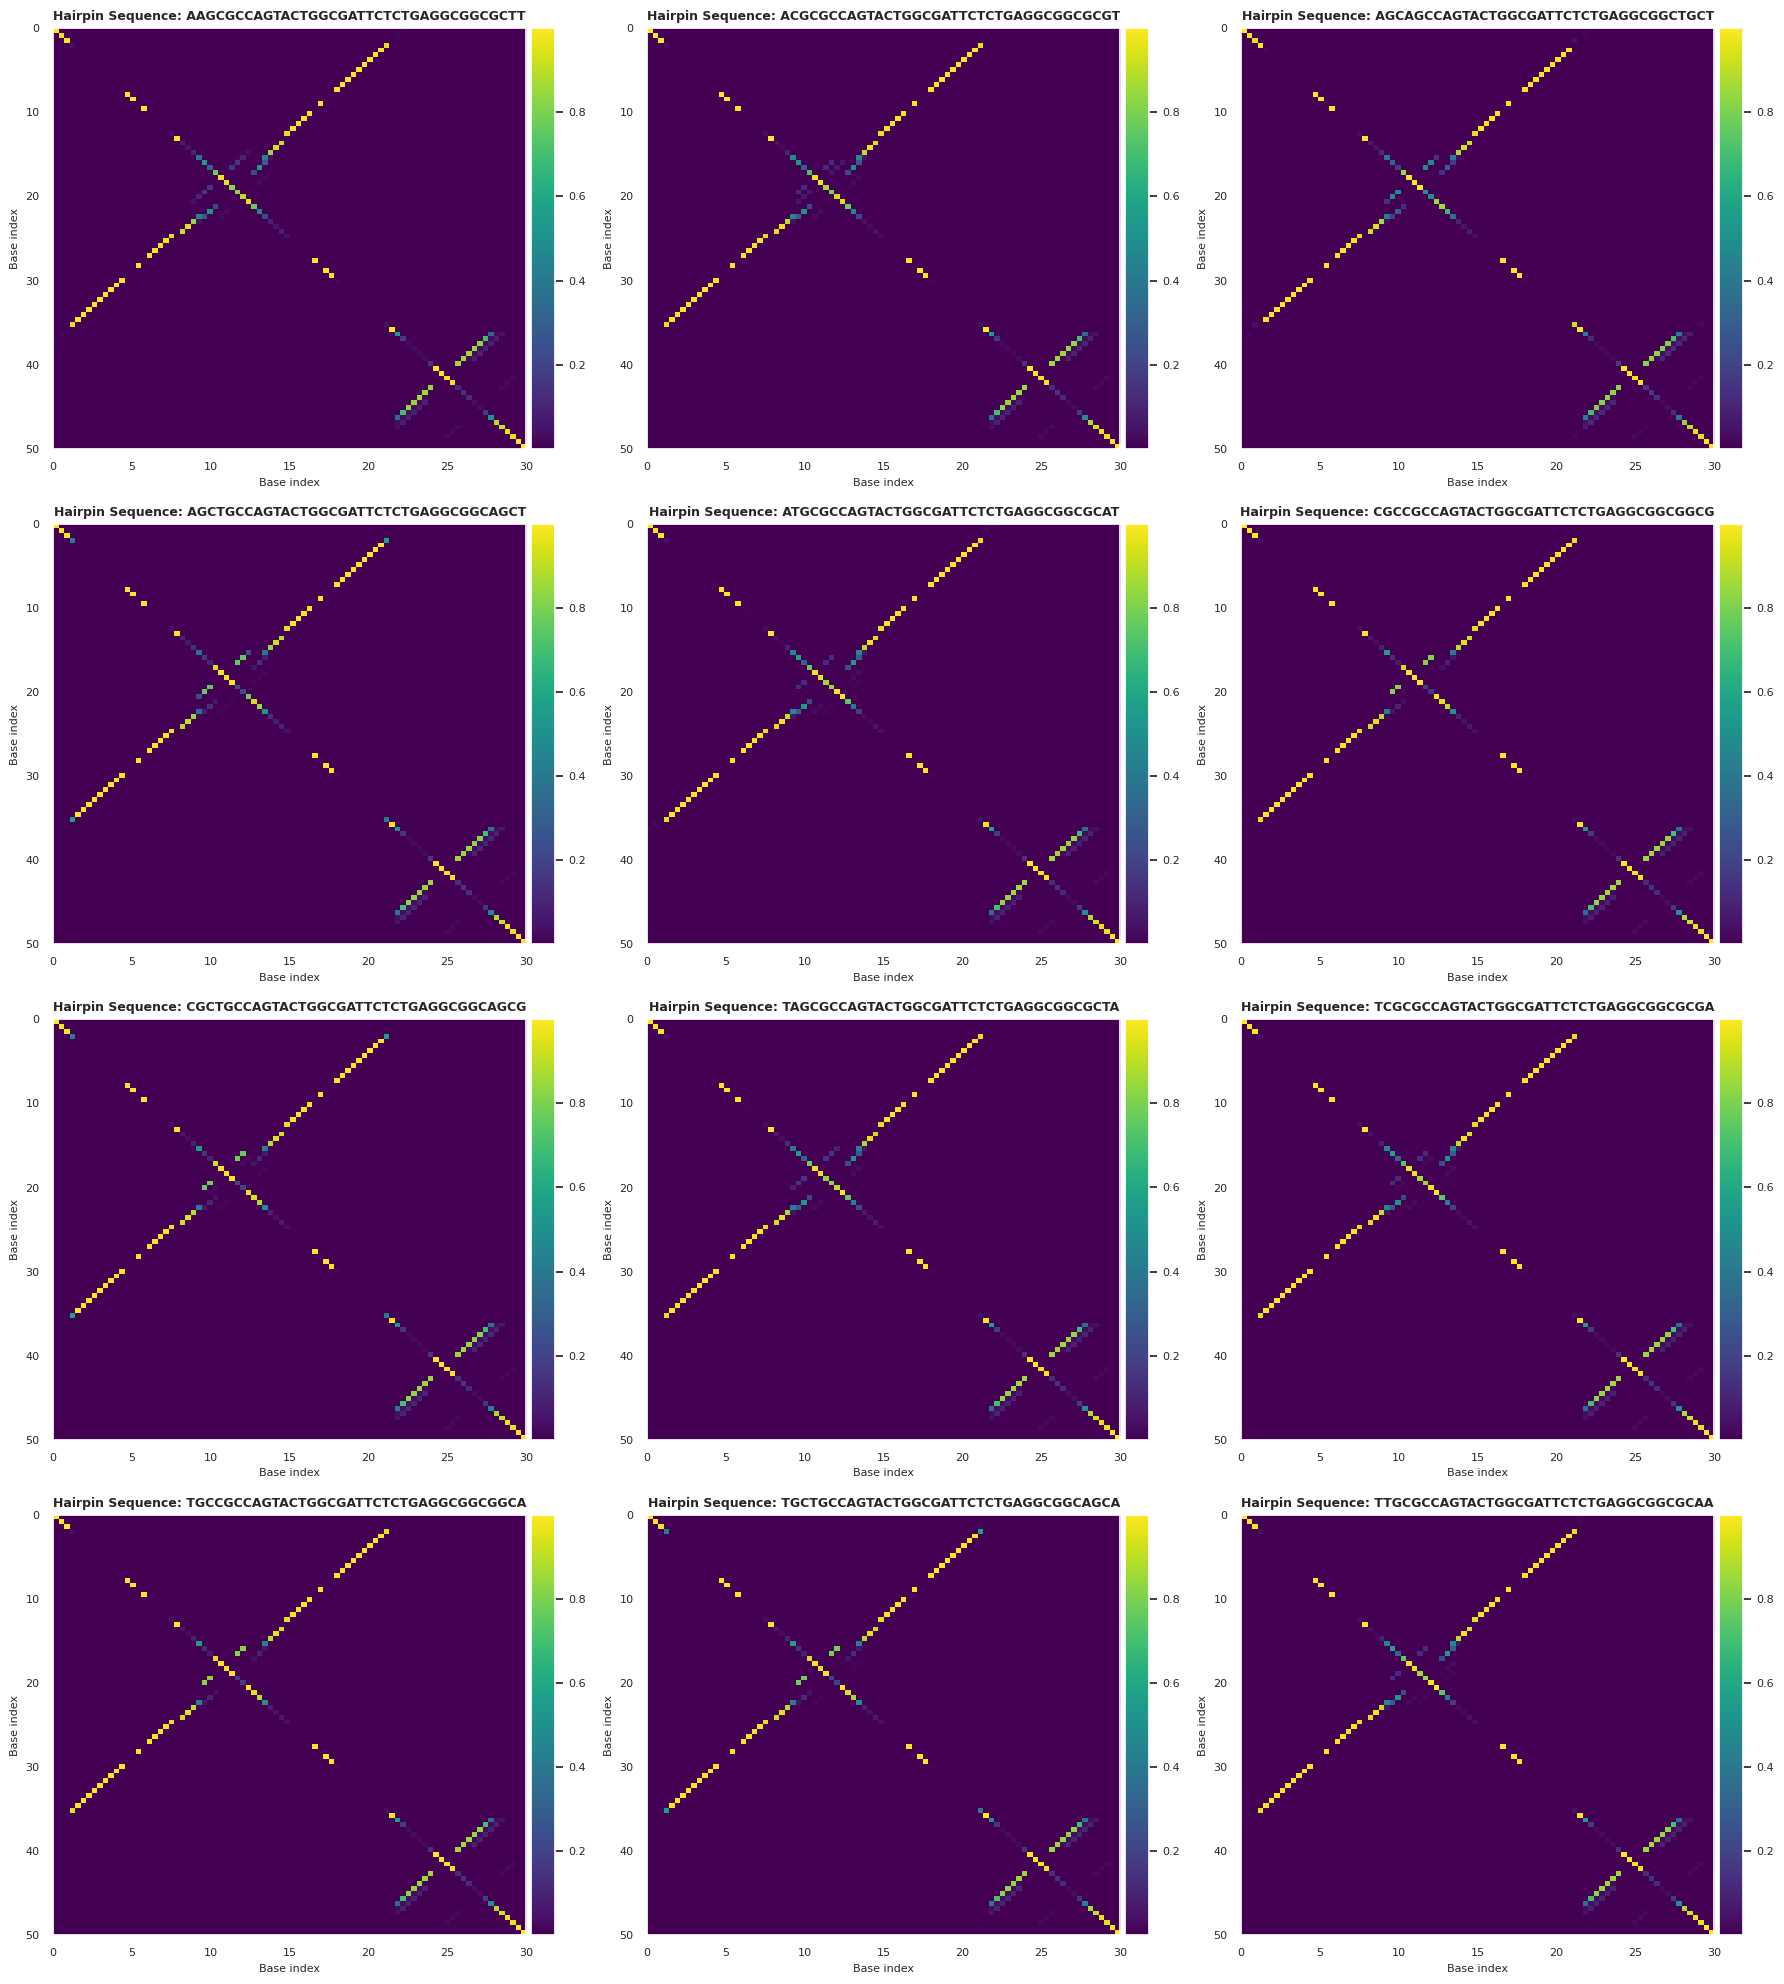

In [148]:
# Plot the probability matrices for visualisation. Hybrid complexes

fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(18, 20))
fig.subplots_adjust(wspace=0.5)
for ax, pb, hairpin, mmp9 in zip(axs.flat, hairpin_pd_optimised['Hyb_Pb'], hairpin_pd_optimised['Hairpin'], hairpin_pd_optimised['MMP9_Seq']):
    im = ax.imshow(pb, interpolation='nearest', cmap='viridis', aspect='auto', extent=[0,30,len(mmp9),0])
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cax.xaxis.set_ticks_position('default')
    cbar = fig.colorbar(im, cax=cax, orientation='vertical', ticks=[0.2, 0.4, 0.6, 0.8])
    cbar.ax.tick_params(labelsize=8)
    
    ax.set_title('Hairpin Sequence: ' + hairpin, fontsize=9, weight='bold')
    ax.set_xlabel('Base index', fontsize=8)
    ax.set_ylabel('Base index', fontsize=8)
    ax.xaxis.set_tick_params(labelsize=8)
    ax.yaxis.set_tick_params(labelsize=8)
    ax.grid(False)
    #print(hairpin)
    #print(mmp9)

fig.savefig('pb_matrix_hybrid.png')
plt.tight_layout()
plt.show()